In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
from scipy import signal as sig

        X
0  1.4506
1  1.6074
2  2.1661
3  1.9675
4  1.4590


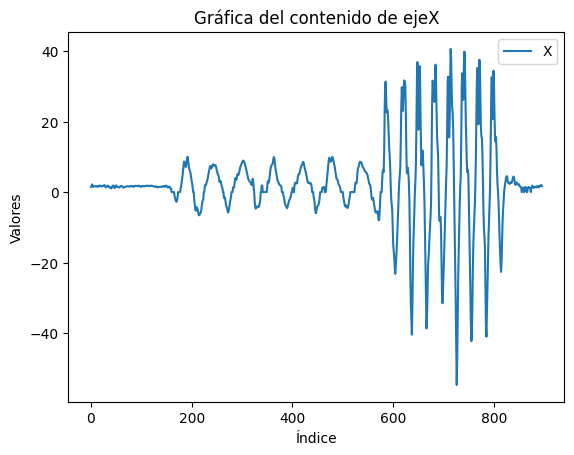

In [51]:
# Cargar el archivo Excel
X = pd.read_excel('ejeX.xlsx')
X = X/10000

# Mostrar las primeras filas del DataFrame para verificar los datos
print(X.head())

# Graficar el contenido del archivo Excel
plt.figure()
for column in X.columns:
    plt.plot(X[column], label=column)

# Añadir etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.title('Gráfica del contenido de ejeX')
plt.legend()
plt.show()

              Y
0  9.600000e-07
1 -6.820000e-06
2  1.502000e-05
3 -1.260000e-06
4 -1.651000e-05


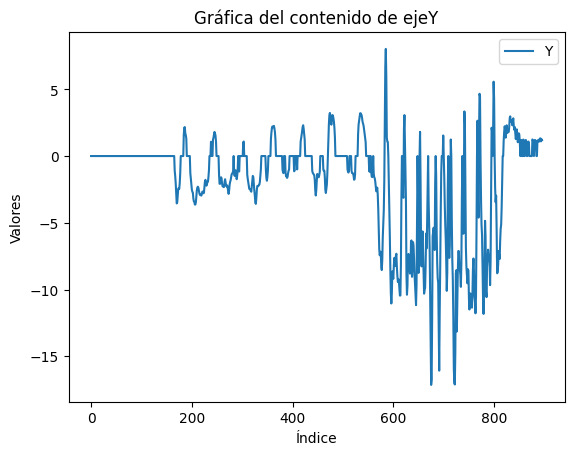

In [52]:
# Cargar el archivo Excel
Y = pd.read_excel('ejeY.xlsx')
Y = Y/10000

# Mostrar las primeras filas del DataFrame para verificar los datos
print(Y.head())

# Graficar el contenido del archivo Excel
plt.figure()
for column in Y.columns:
    plt.plot(Y[column], label=column)

# Añadir etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.title('Gráfica del contenido de ejeY')
plt.legend()
plt.show()

         Z
0   9.4385
1   9.9954
2  10.3801
3  10.1420
4   9.4953


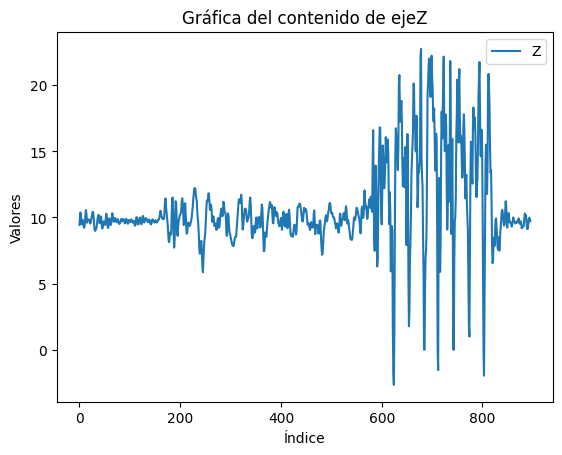

In [53]:
# Cargar el archivo Excel
Z = pd.read_excel('ejeZ.xlsx')
Z = Z/10000

# Mostrar las primeras filas del DataFrame para verificar los datos
print(Z.head())

# Graficar el contenido del archivo Excel
plt.figure()
for column in Z.columns:
    plt.plot(Z[column], label=column)

# Añadir etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.title('Gráfica del contenido de ejeZ')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Acceleration (m/s^2)')

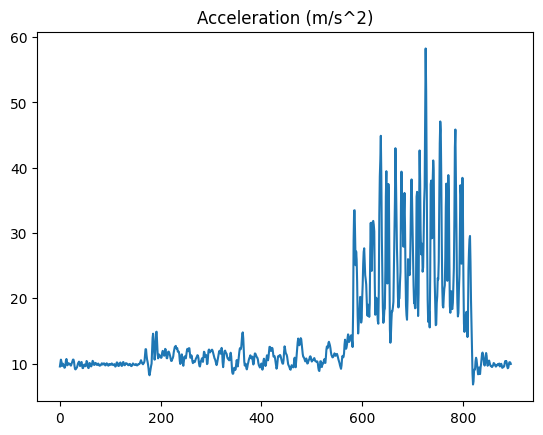

In [54]:
# Calculate the module of acceleration
acceleration_module = np.sqrt(X['X']**2 + Y['Y']**2 + Z['Z']**2)

plt.plot(acceleration_module)
plt.title('Acceleration (m/s^2)')


In [ ]:
# Calcular el pico de acceleration_module
peak_acceleration = acceleration_module.max()
print("El pico de acceleration_module es:", peak_acceleration)

El pico de acceleration_module es: 58.252412303011106


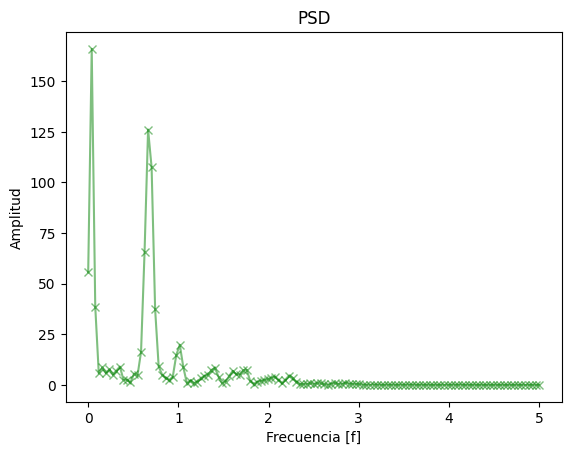

In [55]:
# Conozco la frecuencia de muestreo del sensor Android, por defecto 10Hz
fs = 10;
# Obtengo la PSD del vector a través de Welch
len_acc_module    = len(acceleration_module);
welch_acc  = np.empty((len_acc_module, 1), float);
f_norm, welch_acc = sig.welch(acceleration_module, fs, 'blackman', return_onesided=True)
f_filt = f_norm < 10;
plt.figure(6)
plt.plot(f_norm[f_filt], welch_acc[f_filt], 'x-g', alpha=0.5)
plt.title('PSD');
plt.xlabel('Frecuencia [f]');  
plt.ylabel('Amplitud');

In [56]:
# Encontrar el índice del valor máximo en welch_acc
max_index = np.argmax(welch_acc)

# Encontrar la frecuencia correspondiente en f_norm
max_frequency = f_norm[max_index]

print("La frecuencia con el pico máximo en welch_acc es:", max_frequency, "Hz")

La frecuencia con el pico máximo en welch_acc es: 0.0390625 Hz


In [57]:
total_energy = np.sum(welch_acc);
cumsum_energy = np.cumsum(welch_acc);
# Voy a recorrer el vector cumsum hasta obtener un porcentaje de energía
bw_threshold = 0.98;
for i in range(len(cumsum_energy)):
    if (cumsum_energy[i] >= bw_threshold*total_energy):
        bw_acc_i = i;
        break;
bw_acc = f_norm[bw_acc_i];
print("Energía útil -> BW: ", bw_acc, "Hz");

Energía útil -> BW:  2.265625 Hz


**Filtrado**

Filtro Pasa Banda

## filtrado de toda la señal, sin dividir

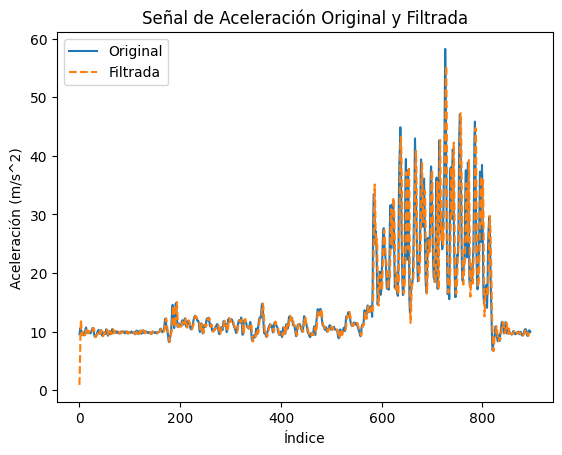

In [62]:
# Aplicar el filtro pasa bajos a acceleration_module
f_cut = 2.5 # 2.27Hz + 10%
N = 4
Wn = f_cut
sos_matrix_lpf = sig.butter(N, Wn, 'lowpass', False, 'sos', fs)

filtered_acceleration = sig.sosfilt(sos_matrix_lpf, acceleration_module)

# Graficar la señal original y la señal filtrada
plt.figure()
plt.plot(acceleration_module, label='Original')
plt.plot(filtered_acceleration, label='Filtrada', linestyle='--')
plt.xlabel('Índice')
plt.ylabel('Aceleración (m/s^2)')
plt.title('Señal de Aceleración Original y Filtrada')
plt.legend()
plt.show()

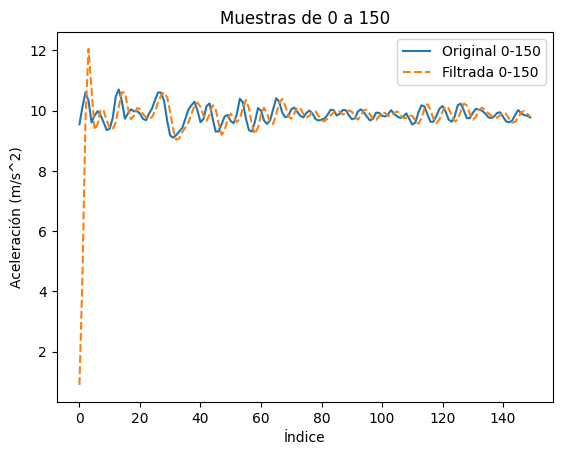

In [64]:
# Mostrar las muestras de 0 a 150
plt.figure()
plt.plot(acceleration_module[0:150], label='Original 0-150')
plt.plot(filtered_acceleration[0:150], label='Filtrada 0-150', linestyle='--')
plt.xlabel('Índice')
plt.ylabel('Aceleración (m/s^2)')
plt.title('Muestras de 0 a 150')
plt.legend()
plt.show()

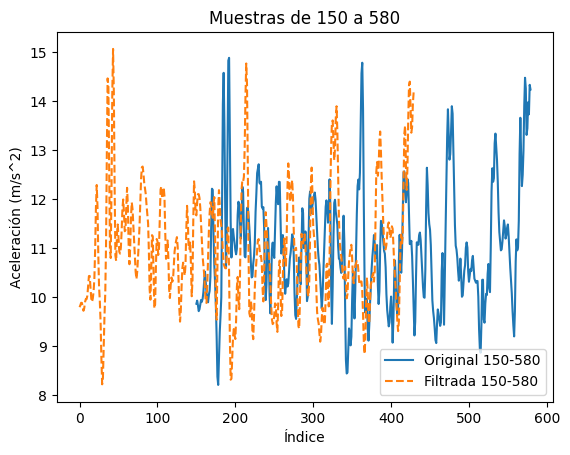

In [67]:
# Mostrar las muestras de 150 a 580
plt.figure()
plt.plot(acceleration_module[150:580], label='Original 150-580')
plt.plot(filtered_acceleration[150:580], label='Filtrada 150-580', linestyle='--')
plt.xlabel('Índice')
plt.ylabel('Aceleración (m/s^2)')
plt.title('Muestras de 150 a 580')
plt.legend()
plt.show()

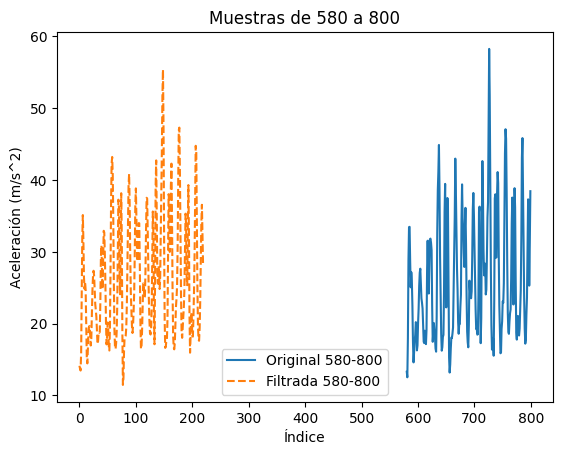

In [66]:


# Mostrar las muestras de 580 a 800
plt.figure()
plt.plot(acceleration_module[580:800], label='Original 580-800')
plt.plot(filtered_acceleration[580:800], label='Filtrada 580-800', linestyle='--')
plt.xlabel('Índice')
plt.ylabel('Aceleración (m/s^2)')
plt.title('Muestras de 580 a 800')
plt.legend()
plt.show()

In [ ]:
# Voy a empezar calculando el filtro pasa altos. Para ellos, establezco 
# que la frecuencia de corte sea de 0.15Hz y que sea de orden 4
f_cut = 0.1
N = 4
Wn = f_cut
sos_matrix_hpf = sig.butter(N, Wn, 'highpass', False, 'sos', fs)

# Voy a seguir filtro pasa bajos. Para ellos, establezco 
# que la frecuencia de corte sea de 7.5Hz y que sea de orden 4

aplicale el siguiente filtro a acceleration_module y hace un plot de la señal original y la señal filtrada, el filtro es:
f_cut = 2.5 # 2.27Hz + 10%
N = 4
Wn = f_cut
sos_matrix_lpf = sig.butter(N, Wn, 'lowpass', False, 'sos', fs)


In [ ]:
falta agregar cero padding en nfft (parametro de Welch)